In [2]:
from karabo_data import RunDirectory
import numpy as np
from matplotlib import pylab as plt

def load_run_data(runNr, digiChannel):
    runDir = '/gpfs/exfel/exp/SQS/201802/p002176/raw/r' + str(runNr).zfill(4)
    run = RunDirectory(runDir)
    data = run.get_array('SQS_DIGITIZER_UTC1/ADC/1:network','digitizers.channel_'+ digiChannel + '.raw.samples')
    data_average = np.average(data,0)
    data_norm = 0
    integral = []
    intense_traces = []
    for trace in data:
        integral.append(np.sum(trace[0:600000]))
    sort = np.argsort(integral)
    for i in range(10):
        intense_traces.append(data[sort[i]][0:600000])
    return data_average[0:600000], integral, intense_traces

digiChannel = '1_A'
check_runs = [235,240,236,239,237,238]

print('Set it all up')
output = []
for entry in check_runs:
    da,dn,di = load_run_data(entry,digiChannel)
    output.append([entry,da,dn,di])
print('Finished reading data')

Set it all up
Finished reading data


<IPython.core.display.Javascript object>


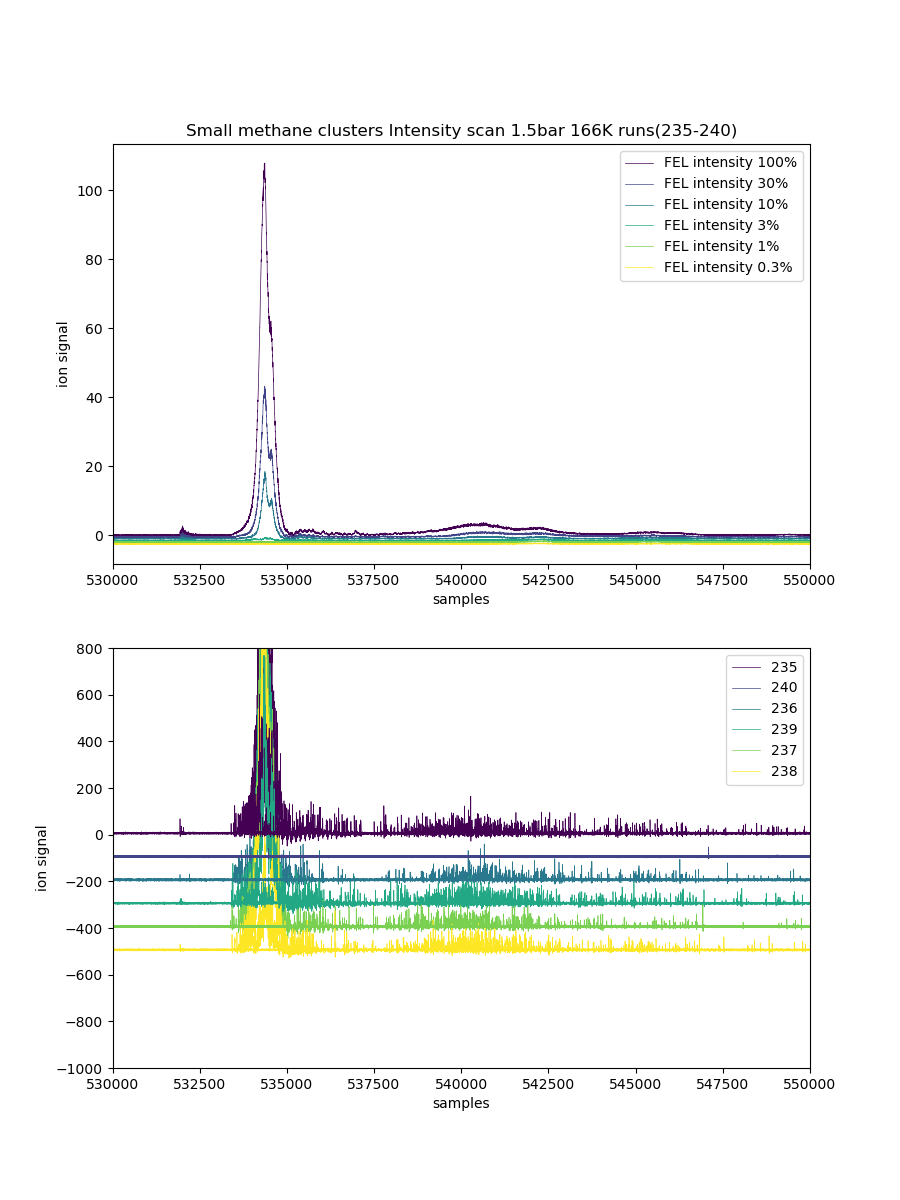

See the plot here!


In [5]:
%matplotlib notebook
fig, axs = plt.subplots(2,1)
plt.rcParams["figure.figsize"] = [9,12]
col = 6
colors = plt.cm.viridis(np.linspace(0,1,col))
for ii, line in enumerate(output):
    baseline = np.mean(line[1][400000:500000])
    fluctuations = []
    for n in range(0,6):
        fluctuations.extend(line[1][400000:500000])
    line[1] = line[1] - fluctuations
    axs[0].plot(line[1]*-1-ii*0.5 + baseline, linewidth = 0.5, color = colors[ii%col])
    axs[1].plot(line[2], label = line[0], linewidth = 0.5, color = colors[ii%col])
    for i in [0,1,2,3,4,5]:
        axs[1].plot(line[3][i]*-1-i*100, linewidth = 0.5, color = colors[i%col])
#axs[0].set_ylim(-2.5,5)
axs[0].set_xlim(530000,550000)
axs[1].set_ylim(-1000,800)
axs[1].set_xlim(530000,550000)
axs[0].set_title('Small methane clusters Intensity scan 1.5bar 166K runs(235-240)')
axs[1].set_ylabel('ion signal')
axs[0].set_ylabel('ion signal')
axs[1].set_xlabel('samples')
axs[0].set_xlabel('samples')
axs[1].legend(loc = 1)
axs[0].legend(labels = ['FEL intensity 100%', 'FEL intensity 30%', 'FEL intensity 10%', 'FEL intensity 3%', 'FEL intensity 1%', 'FEL intensity 0.3%'],loc = 1)
plt.show()
print('See the plot here!')